In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from nltk import agreement
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import cohen_kappa_score
import numpy as np

In [3]:
root_directory = "/content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/data/"

In [17]:
df = pd.read_csv(root_directory + "problematicdata.csv")
df

,IMAGE_NAME,CLASS_BY_MH,CLASS_BY_ME,CLASS_BY_DK
0,TR1,2,2,5
1,TR2,0,0,0
2,TR3,2,1,1
3,TR4,2,1,1
4,TR5,2,1,1
5,TR6,0,0,0
6,TR7,0,0,0
7,TR8,2,2,5
8,TR9,2,2,5
9,TR10,1,1,1


In [18]:
rater1 = list(df.CLASS_BY_MH)
rater2 = list(df.CLASS_BY_ME)
rater3 = list(df.CLASS_BY_DK)

In [19]:
taskdata = [[0, str(i), str(rater1[i])] for i in range(0, len(rater1))] + \
           [[1, str(i), str(rater2[i])] for i in range(0, len(rater2))] + \
           [[2, str(i), str(rater3[i])] for i in range(0, len(rater3))]
"""
taskdata tworzy nam listę list w formacie:
[id_ratera, 'id_przykladu', 'ocena']
"""

"\ntaskdata tworzy nam listę list w formacie:\n[id_ratera, 'id_przykladu', 'ocena']\n"

In [20]:
print(len(rater1))
for i in range(0, len(rater1)):
  #print(str(i))
  print(rater1[i])

17
2
0
2
2
2
0
0
2
2
1
1
1
2
2
2
0
0


In [21]:
taskdata

[[0, '0', '2'],
 [0, '1', '0'],
 [0, '2', '2'],
 [0, '3', '2'],
 [0, '4', '2'],
 [0, '5', '0'],
 [0, '6', '0'],
 [0, '7', '2'],
 [0, '8', '2'],
 [0, '9', '1'],
 [0, '10', '1'],
 [0, '11', '1'],
 [0, '12', '2'],
 [0, '13', '2'],
 [0, '14', '2'],
 [0, '15', '0'],
 [0, '16', '0'],
 [1, '0', '2'],
 [1, '1', '0'],
 [1, '2', '1'],
 [1, '3', '1'],
 [1, '4', '1'],
 [1, '5', '0'],
 [1, '6', '0'],
 [1, '7', '2'],
 [1, '8', '2'],
 [1, '9', '1'],
 [1, '10', '1'],
 [1, '11', '1'],
 [1, '12', '1'],
 [1, '13', '1'],
 [1, '14', '1'],
 [1, '15', '3'],
 [1, '16', '0'],
 [2, '0', '5'],
 [2, '1', '0'],
 [2, '2', '1'],
 [2, '3', '1'],
 [2, '4', '1'],
 [2, '5', '0'],
 [2, '6', '0'],
 [2, '7', '5'],
 [2, '8', '5'],
 [2, '9', '1'],
 [2, '10', '1'],
 [2, '11', '1'],
 [2, '12', '1'],
 [2, '13', '1'],
 [2, '14', '1'],
 [2, '15', '3'],
 [2, '16', '3']]

Tu odbywa się Annotation task z modułu nltk: 
- https://stackoverflow.com/questions/11528150/inter-rater-agreement-in-python-cohens-kappa
- https://www.nltk.org/api/nltk.metrics.agreement.html

###### An agreement coefficient calculates the amount that annotators agreed on label assignments beyond what is expected by chance.

In [22]:
ratingtask = agreement.AnnotationTask(data=taskdata)

# WYNIKI
### Najważniejsza statystyka to avg_Ao(): Average observed agreement across all coders and items.
t.avg_Ao()

In [23]:
print("Average observed agreement across all coders and items: " +str(ratingtask.avg_Ao()))

Average observed agreement across all coders and items: 0.5686274509803921


#### Dalej, w kolejności możemy też zweryfikować statystykę kappa:
{1} Viera, Anthony J., and Joanne M. Garrett. "Understanding interobserver agreement: the kappa statistic." Fam Med 37, no. 5 (2005): 360-363. 
https://www.ncbi.nlm.nih.gov/pubmed/15883903
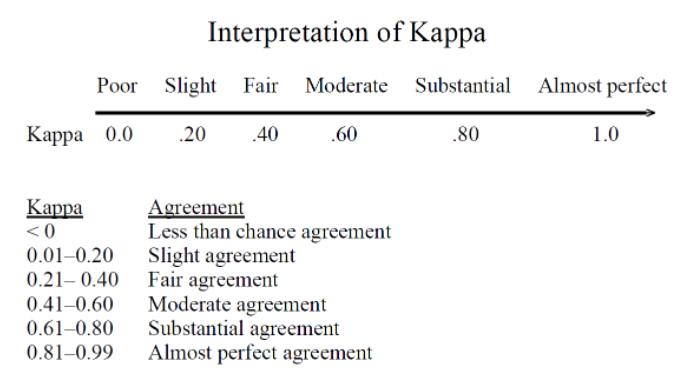

In [24]:
print("Kappa coefficient: " + str(ratingtask.kappa()))
print("Weighted kappa coefficient: " + str(ratingtask.weighted_kappa()))

Kappa coefficient: 0.44630371458217866
Weighted kappa coefficient: 0.44630371458217866


Knowing kappa coefficient, we can also calculate the observed disagreement for the weighted kappa coefficient averaged over all labelers.

In [25]:
print("The observed disagreement: " +str(ratingtask.Do_Kw()))

The observed disagreement: 0.43137254901960786


Wizualizacja danych

In [28]:
raters = [rater1, rater2, rater3] #list of raters
data = np.zeros((len(raters), len(raters))) #macierz NxN, N=liczba raterów

# Calculate cohen_kappa_score for every combination of raters
# Combinations are only calculated j -> k, but not k -> j, which are equal
# So not all places in the matrix are filled.
for j, k in list(itertools.combinations(range(len(raters)), r=2)):
    data[j, k] = cohen_kappa_score(raters[j], raters[k])

# [[0.        , 0.11764706, 0.        ],
#  [0.        , 0.        , 0.25      ],
#  [0.        , 0.        , 0.        ]]

In [30]:
data

array([[0.        , 0.44651163, 0.24291498],
       [0.        , 0.        , 0.64948454],
       [0.        , 0.        , 0.        ]])

In [29]:
list(itertools.combinations(range(len(raters)), r=2))

[(0, 1), (0, 2), (1, 2)]

In [ ]:
for j, k in list(itertools.combinations(range(len(raters)), r=2)):
  print(j, k)

0 1
0 2
1 2


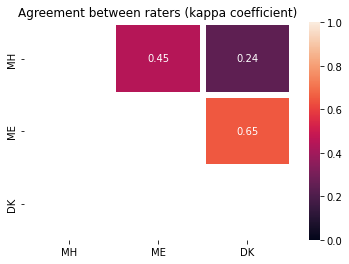

In [32]:
sns.heatmap(
    data, 
    mask=np.tri(len(raters)),
    annot=True, linewidths=5,
    vmin=0, vmax=1,
    xticklabels=["MH", "ME", "DK"],
    yticklabels=["MH", "ME", "DK"]
    # xticklabels=[f"Rater {k + 1}" for k in range(len(raters))],
    # yticklabels=[f"Rater {k + 1}" for k in range(len(raters))]
)
plt.title("Agreement between raters (kappa coefficient)")
plt.show()